In [ ]:
【例17.1】泰坦尼克数据应用集成学习举例。

In [ ]:
1．获取数据，并输出数据分析的结果，可以发现Age这列有缺失值

In [13]:
import pandas as pd
titanic = pd.read_csv('Titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
print(titanic.describe())  # 输出结果如图17-1所示

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [ ]:
2．使用中值进行数据填充

In [15]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
print(titanic.describe())  # 填充后输出结果如图17-2所示 

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [ ]:
3．将Sex这一列的字符串转成整数，方便计算

In [16]:
print(titanic['Sex'].unique())
# 0:表示男，1表示女
titanic.loc[titanic['Sex'] == 'male','Sex'] = 0
titanic.loc[titanic['Sex'] == 'female','Sex'] = 1

['male' 'female']


In [ ]:
4．将Embarked这一列的字符串转成整数

In [17]:
print(titanic['Embarked'].unique())
titanic["Embarked"] = titanic["Embarked"].fillna('S')
titanic.loc[titanic["Embarked"] == "S", "Embarked"] = 0
titanic.loc[titanic["Embarked"] == "C", "Embarked"] = 1
titanic.loc[titanic["Embarked"] == "Q", "Embarked"] = 2

['S' 'C' 'Q' nan]


In [ ]:
5．使用线性回归方法

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
# 预测所用到的特征
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
# 初始化线性回归函数
lg = LinearRegression()
# 初始化K折交叉验证函数
# 其中KFold是一个类，n_split=3表示，当执行KFold的split函数后，数据集被分成三份，两份训练集和一份验证集。
kf = KFold(n_splits=3,shuffle=False)
predictions = []
for train,test in kf.split(titanic):
    train_predictors = titanic[predictors].loc[train,:]
    train_target = titanic['Survived'].loc[train]
    lg.fit(train_predictors,train_target)
    test_predictions = lg.predict(titanic[predictors].loc[test,:])
    predictions.append(test_predictions)
import numpy as np
predictions = np.concatenate(predictions,axis = 0)
# 匹配输出结果，1表示生存，0表示死亡
predictions[predictions > .5] = 1
predictions[predictions <= .5] = 0
accuracy = sum(predictions== titanic['Survived']) / len(predictions)
print(accuracy)

0.7833894500561167


In [ ]:
6．使用逻辑回归方法

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
# 初始化逻辑回归函数
lr = LogisticRegression(random_state=1,solver='liblinear')
# 应用交叉验证并计算精确分数
scores = cross_val_score(lr,titanic[predictors],titanic['Survived'],cv=3)
print(scores.mean())

0.7878787878787877


In [ ]:
7．使用随机森林方法

In [20]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
# n_estimators:树的个数
# min_samples_split:如果某节点的样本数少于min_samples_split，则不会继续再尝试选择最优特征来进行划分
# 如果样本量不大，不需要管这个值。如果样本量数量级非常大，则推荐增大这个值
# min_samples_leaf:这个值限制了叶子节点最少的样本数，如果某叶子节点数目小于样本数，
# 则会和兄弟节点一起被剪枝，如果样本量不大，不需要管这个值，大些如10W可是尝试下5
rfc = RandomForestClassifier(random_state=1,
							 n_estimators=10,
							min_samples_split=2,
							min_samples_leaf=1)
# 初始化K折交叉验证函数
kf = KFold(n_splits=3,shuffle=False)
scores = cross_val_score(rfc,titanic[predictors],titanic['Survived'],cv=kf)
print(scores.mean())

0.7856341189674523


In [ ]:
8．调整参数之后的随机森林

In [21]:
rfc = RandomForestClassifier(random_state=1,
							   n_estimators=100,
							   min_samples_split=4,
							   min_samples_leaf=2)
# 初始化K折交叉验证函数
kf = KFold(n_splits=3,shuffle=False)
scores = cross_val_score(rfc,titanic[predictors],titanic['Survived'],cv=kf)
print(scores.mean())

0.8148148148148148


In [ ]:
9．构造新的特征

In [22]:
# 生成一个家庭人数列
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"]
# 生成一个姓名长度series
titanic["NameLength"] = titanic["Name"].apply(lambda x:len(x))
import re
def get_title(name):
    # 使用正则表达式搜索标题。标题总是由大写字母和小写字母组成，以句号结尾。
    title_search = re.search(' ([A-Za-z]+)\.',name)
    # 如果标题存在，提取并返回它.
    if title_search:
        return title_search.group(1)
    return ''
# 得到所有的名字的简称（title）
titles = titanic["Name"].apply(get_title)
print(pd.value_counts(titles))
# 把每个title映射成整数，一些title是比较稀少的，所以被压缩成与其他标题相同的编码。
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, 
"Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10,
 "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
for k,v in title_mapping.items():
    titles[titles == k] = v
print(pd.value_counts(titles))
# 添加一个新的列
titanic['Title'] = titles

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Countess      1
Capt          1
Jonkheer      1
Sir           1
Lady          1
Ms            1
Mme           1
Don           1
Name: Name, dtype: int64
1     517
2     183
3     125
4      40
5       7
6       6
7       5
10      3
8       3
9       2
Name: Name, dtype: int64


In [ ]:
10．特征重要性分析

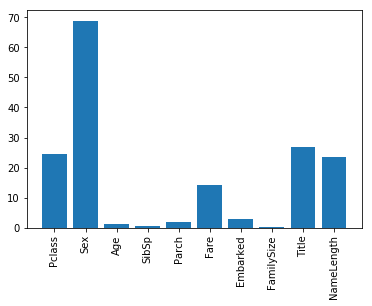

In [23]:
import numpy as np
%matplotlib inline
from sklearn.feature_selection import SelectKBest,f_classif
# f_classif为方差分析，用来计算特征的f统计量的。
import matplotlib.pyplot as plt
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", 
"FamilySize", "Title", "NameLength"]
# 特征选择
selector = SelectKBest(f_classif,k=5)
selector.fit(titanic[predictors],titanic['Survived'])
# 得到每一维特征的p值，把p值转化成分数
scores = -np.log10(selector.pvalues_)
# 画出分数，观察特征的分数
plt.bar(range(len(predictors)),scores)
plt.xticks(range(len(predictors)),predictors,rotation='vertical')
plt.show()  # 特征分数如图17-3所示

In [24]:
predictors = ["Pclass", "Sex", "Fare", "Title"]
rfc = RandomForestClassifier(random_state=1,
							 n_estimators=50,
							 min_samples_split=8,
							 min_samples_leaf=4)
scores = cross_val_score(rfc,titanic[predictors],titanic['Survived'],cv=3)
print(scores.mean())

0.8170594837261503


In [ ]:
11． 每个算法都会有自己的优缺点，那么我们可不可以把两个模型集成起来呢？将boosting算法与逻辑回归算法分别进行训练，然后给予不同的权值使得结果更加精确

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
algorithms = [
 [GradientBoostingClassifier(random_state=1,n_estimators=25,max_depth=3), ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Title"]],
    [LogisticRegression(random_state=1,solver='liblinear'), ["Pclass", "Sex", "Fare", "FamilySize", "Title", "Age", "Embarked"]]
]
# 初始化交叉熵
kf = KFold(n_splits=3,shuffle=False)
predictions = []
for train,test in kf.split(titanic):
    train_target = titanic['Survived'].loc[train]
    full_test_predictions = []
    # 使用每个算法进行预测
    for alg,predictors in algorithms:
        alg.fit(titanic[predictors].loc[train,:],train_target)
        # 在测试集上进行预测
        test_predictions = alg.predict_proba(titanic[predictors].loc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    test_predictions = (full_test_predictions[0] + full_test_predictions[1]) / 2
    test_predictions[test_predictions <= .5] = 0
    test_predictions[test_predictions > .5] = 1
    predictions.append(test_predictions)
predictions = np.concatenate(predictions, axis=0)
# 计算准确率
accuracy = sum(predictions == titanic["Survived"]) / len(predictions)
print(accuracy)

0.8215488215488216


In [ ]:
12．继续集成，将随机森林算法与逻辑回归算法分别进行训练，然后给予不同的权值使得结果更加精确

In [26]:
from sklearn.model_selection import KFold,cross_val_score
algorithms = [
    [RandomForestClassifier(random_state=1, n_estimators=20, min_samples_split=4, min_samples_leaf=2),
     ['Pclass', 'Sex', 'Age',  'Fare', 'Embarked', 'FamilySize',  'Title']],
    [LogisticRegression(random_state=1),
     ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'Title']]
]
kf = KFold(n_splits=11, random_state=1)
predictions = []
for train, test in kf.split(titanic):
    train_target = titanic['Survived'].loc[train]
    full_test_predictions = []
    for alg, predictors in algorithms:
        alg.fit(titanic[predictors].iloc[train, :], train_target)
        test_prediction = alg.predict_proba(titanic[predictors].iloc[test, :].astype(float))[:, 1]
        full_test_predictions.append(test_prediction)
    test_predictions = (full_test_predictions[0]*2 + full_test_predictions[1]) / 3
    test_predictions[test_predictions > .5] = 1
    test_predictions[test_predictions <= .5] = 0
    predictions.append(test_predictions)
predictions = np.concatenate(predictions, axis=0)
# 计算准确率
accuracy = sum(predictions == titanic['Survived']) / len(predictions)  
print(accuracy)

0.8361391694725028


In [ ]:
13．使用集成学习装袋法

In [28]:
from sklearn.ensemble import BaggingClassifier
predictors=["Pclass", "Sex", "Fare", "FamilySize", "Title", "Age", "Embarked"]
lr=BaggingClassifier(base_estimator=rfc,
                     n_estimators=700,
                     random_state=10)
scores = cross_val_score(lr,titanic[predictors],titanic['Survived'],cv=3)
print(scores.mean())

0.8271604938271605
